In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
from datetime import datetime
from datetime import date
from time import time
from fbprophet import Prophet
import fbprophet
from sklearn.preprocessing import StandardScaler
import time
from pathlib import Path
pd.options.plotting.backend = "plotly"
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import datetime
import random
from numpy.random import seed
from numpy.random import randn
from hyperopt import fmin, rand,tpe,hp,Trials,exceptions,space_eval,STATUS_FAIL, STATUS_OK, SparkTrials

# random.seed(30)
# np.random.seed(seed=1234)

In [132]:
# !pip install fbprophet

In [1]:
# sdge = pd.read_csv('Data.csv', index_col = 'Dates', parse_dates=['Dates', 'Date'])
df = pd.read_excel (r'data.xlsx')

NameError: name 'pd' is not defined

In [134]:
df

,Ser No,Timestamp,Voltage,DeltaV,Status
0,1.0,2021-11-18 00:00:00.000,3965.0,0.0,OK
1,2.0,2021-11-18 02:00:00.000,3965.0,0.0,OK
2,3.0,2021-11-18 02:20:00.000,3965.0,0.0,OK
3,4.0,2021-11-18 02:40:00.000,3961.0,-4.0,OK
4,5.0,2021-11-18 03:00:00.000,3961.0,0.0,OK
...,...,...,...,...,...
5830,NaN,2032-06-11 04:19:59.990,NaN,NaN,NaN
5831,NaN,2032-06-12 04:19:59.990,NaN,NaN,NaN
5832,NaN,2032-06-13 04:19:59.990,NaN,NaN,NaN
5833,NaN,2032-06-14 04:19:59.990,NaN,NaN,NaN


<AxesSubplot:>

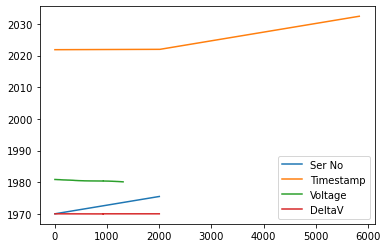

In [135]:
df.plot()

In [136]:
df3 = df.rename(columns={'Timestamp': 'ds', 'Voltage': 'y'})

In [137]:
df3

,Ser No,ds,y,DeltaV,Status
0,1.0,2021-11-18 00:00:00.000,3965.0,0.0,OK
1,2.0,2021-11-18 02:00:00.000,3965.0,0.0,OK
2,3.0,2021-11-18 02:20:00.000,3965.0,0.0,OK
3,4.0,2021-11-18 02:40:00.000,3961.0,-4.0,OK
4,5.0,2021-11-18 03:00:00.000,3961.0,0.0,OK
...,...,...,...,...,...
5830,NaN,2032-06-11 04:19:59.990,NaN,NaN,NaN
5831,NaN,2032-06-12 04:19:59.990,NaN,NaN,NaN
5832,NaN,2032-06-13 04:19:59.990,NaN,NaN,NaN
5833,NaN,2032-06-14 04:19:59.990,NaN,NaN,NaN


In [138]:
df4 = df.copy()
df4.set_index('Timestamp', inplace = True)
df4 = df4.resample('20min').mean()
df4 = df4.reset_index()


In [139]:
df

,Ser No,Timestamp,Voltage,DeltaV,Status
0,1.0,2021-11-18 00:00:00.000,3965.0,0.0,OK
1,2.0,2021-11-18 02:00:00.000,3965.0,0.0,OK
2,3.0,2021-11-18 02:20:00.000,3965.0,0.0,OK
3,4.0,2021-11-18 02:40:00.000,3961.0,-4.0,OK
4,5.0,2021-11-18 03:00:00.000,3961.0,0.0,OK
...,...,...,...,...,...
5830,NaN,2032-06-11 04:19:59.990,NaN,NaN,NaN
5831,NaN,2032-06-12 04:19:59.990,NaN,NaN,NaN
5832,NaN,2032-06-13 04:19:59.990,NaN,NaN,NaN
5833,NaN,2032-06-14 04:19:59.990,NaN,NaN,NaN


In [140]:
df3

,Ser No,ds,y,DeltaV,Status
0,1.0,2021-11-18 00:00:00.000,3965.0,0.0,OK
1,2.0,2021-11-18 02:00:00.000,3965.0,0.0,OK
2,3.0,2021-11-18 02:20:00.000,3965.0,0.0,OK
3,4.0,2021-11-18 02:40:00.000,3961.0,-4.0,OK
4,5.0,2021-11-18 03:00:00.000,3961.0,0.0,OK
...,...,...,...,...,...
5830,NaN,2032-06-11 04:19:59.990,NaN,NaN,NaN
5831,NaN,2032-06-12 04:19:59.990,NaN,NaN,NaN
5832,NaN,2032-06-13 04:19:59.990,NaN,NaN,NaN
5833,NaN,2032-06-14 04:19:59.990,NaN,NaN,NaN


In [141]:
model = Prophet(growth='linear',
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
                
    seasonality_mode='additive',
    interval_width=0.95)


In [142]:
df4 = df3.rename(columns={'Timestamp': 'ds', 'Voltage': 'y'})

In [143]:
df4.shape

(5835, 5)

In [144]:
df4_train= df4[(df4.ds >= '2021-11-18 00:00:00')].dropna()
df4_test = df4[(df4.ds >= '2021-12-16 00:00:00')]
#df_future=df3[(df3.ds >= '2021-12-16 00:00:00')]
#df4_train.head()
print(df4_train.shape)
print(df4_test.shape)   
#print(df_future.shape)

(1307, 5)
(4524, 5)


In [145]:
df4_test

,Ser No,ds,y,DeltaV,Status
1308,1309.0,2021-12-16 00:19:59.995,NaN,0.0,OK
1309,1310.0,2021-12-16 00:39:59.995,NaN,0.0,OK
1310,1311.0,2021-12-16 00:59:59.995,NaN,0.0,OK
1311,1312.0,2021-12-16 01:19:59.995,NaN,0.0,OK
1312,1313.0,2021-12-16 01:39:59.995,NaN,0.0,OK
...,...,...,...,...,...
5830,NaN,2032-06-11 04:19:59.990,NaN,NaN,NaN
5831,NaN,2032-06-12 04:19:59.990,NaN,NaN,NaN
5832,NaN,2032-06-13 04:19:59.990,NaN,NaN,NaN
5833,NaN,2032-06-14 04:19:59.990,NaN,NaN,NaN


In [146]:
df_future

,Ser No,ds,y,DeltaV,Status
1308,1309,2021-12-16 00:19:59.995,NaN,0.0,OK
1309,1310,2021-12-16 00:39:59.995,NaN,0.0,OK
1310,1311,2021-12-16 00:59:59.995,NaN,0.0,OK
1311,1312,2021-12-16 01:19:59.995,NaN,0.0,OK
1312,1313,2021-12-16 01:39:59.995,NaN,0.0,OK
...,...,...,...,...,...
1997,1998,2021-12-16 03:19:59.995,NaN,0.0,OK
1998,1999,2021-12-16 03:39:59.995,NaN,0.0,OK
1999,2000,2021-12-16 03:59:59.995,NaN,0.0,OK
2000,2001,2021-12-16 04:19:59.995,NaN,0.0,OK


In [147]:
model = Prophet()

model.fit(df4_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [148]:
future_dates = df4_test[['ds']]

# Make future predictions and save them in 'forecast' variable
forecast = model.predict(future_dates)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-16 00:19:59.995,3696.343164,3.689791e+03,3693.330883,3.696343e+03,3696.343164,-4.823216,-4.823216,-4.823216,-0.380866,-0.380866,-0.380866,-4.442350,-4.442350,-4.442350,0.0,0.0,0.0,3691.519948
1,2021-12-16 00:19:59.995,3696.343164,3.689718e+03,3693.307364,3.696343e+03,3696.343164,-4.823216,-4.823216,-4.823216,-0.380866,-0.380866,-0.380866,-4.442350,-4.442350,-4.442350,0.0,0.0,0.0,3691.519948
2,2021-12-16 00:39:59.995,3696.145512,3.689455e+03,3692.983570,3.696146e+03,3696.145512,-4.858769,-4.858769,-4.858769,-0.358275,-0.358275,-0.358275,-4.500494,-4.500494,-4.500494,0.0,0.0,0.0,3691.286743
3,2021-12-16 00:39:59.995,3696.145512,3.689461e+03,3693.048074,3.696146e+03,3696.145512,-4.858769,-4.858769,-4.858769,-0.358275,-0.358275,-0.358275,-4.500494,-4.500494,-4.500494,0.0,0.0,0.0,3691.286743
4,2021-12-16 00:59:59.995,3695.947859,3.689221e+03,3692.811417,3.695948e+03,3695.947859,-4.892458,-4.892458,-4.892458,-0.334691,-0.334691,-0.334691,-4.557767,-4.557767,-4.557767,0.0,0.0,0.0,3691.055401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,2032-06-11 04:19:59.990,-50810.663426,-1.084916e+06,893399.669936,-1.084912e+06,893403.809830,-4.204293,-4.204293,-4.204293,-0.165862,-0.165862,-0.165862,-4.038430,-4.038430,-4.038430,0.0,0.0,0.0,-50814.867719
4520,2032-06-12 04:19:59.990,-50824.894401,-1.085357e+06,893968.873229,-1.085358e+06,893969.374060,0.712107,0.712107,0.712107,-0.165862,-0.165862,-0.165862,0.877969,0.877969,0.877969,0.0,0.0,0.0,-50824.182294
4521,2032-06-13 04:19:59.990,-50839.125376,-1.085791e+06,894536.378604,-1.085795e+06,894533.938601,3.440959,3.440959,3.440959,-0.165862,-0.165862,-0.165862,3.606821,3.606821,3.606821,0.0,0.0,0.0,-50835.684417
4522,2032-06-14 04:19:59.990,-50853.356351,-1.086225e+06,895101.573204,-1.086228e+06,895099.053560,3.963077,3.963077,3.963077,-0.165862,-0.165862,-0.165862,4.128939,4.128939,4.128939,0.0,0.0,0.0,-50849.393274


In [149]:
future_dates = df4_test[['ds']]

#pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

# Make future predictions and save them in 'forecast' variable
forecast = model.predict(future_dates)
#forecast = model.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-16 00:19:59.995,3696.343164,3.689642e+03,3693.168213,3.696343e+03,3696.343164,-4.823216,-4.823216,-4.823216,-0.380866,-0.380866,-0.380866,-4.442350,-4.442350,-4.442350,0.0,0.0,0.0,3691.519948
1,2021-12-16 00:19:59.995,3696.343164,3.689731e+03,3693.355481,3.696343e+03,3696.343164,-4.823216,-4.823216,-4.823216,-0.380866,-0.380866,-0.380866,-4.442350,-4.442350,-4.442350,0.0,0.0,0.0,3691.519948
2,2021-12-16 00:39:59.995,3696.145512,3.689444e+03,3693.045921,3.696146e+03,3696.145512,-4.858769,-4.858769,-4.858769,-0.358275,-0.358275,-0.358275,-4.500494,-4.500494,-4.500494,0.0,0.0,0.0,3691.286743
3,2021-12-16 00:39:59.995,3696.145512,3.689530e+03,3692.985142,3.696146e+03,3696.145512,-4.858769,-4.858769,-4.858769,-0.358275,-0.358275,-0.358275,-4.500494,-4.500494,-4.500494,0.0,0.0,0.0,3691.286743
4,2021-12-16 00:59:59.995,3695.947859,3.689395e+03,3692.684738,3.695948e+03,3695.947859,-4.892458,-4.892458,-4.892458,-0.334691,-0.334691,-0.334691,-4.557767,-4.557767,-4.557767,0.0,0.0,0.0,3691.055401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,2032-06-11 04:19:59.990,-50810.663426,-1.050111e+06,977606.187992,-1.050107e+06,977613.387446,-4.204293,-4.204293,-4.204293,-0.165862,-0.165862,-0.165862,-4.038430,-4.038430,-4.038430,0.0,0.0,0.0,-50814.867719
4520,2032-06-12 04:19:59.990,-50824.894401,-1.050518e+06,977987.078021,-1.050519e+06,977985.616358,0.712107,0.712107,0.712107,-0.165862,-0.165862,-0.165862,0.877969,0.877969,0.877969,0.0,0.0,0.0,-50824.182294
4521,2032-06-13 04:19:59.990,-50839.125376,-1.050926e+06,978361.153793,-1.050931e+06,978357.458610,3.440959,3.440959,3.440959,-0.165862,-0.165862,-0.165862,3.606821,3.606821,3.606821,0.0,0.0,0.0,-50835.684417
4522,2032-06-14 04:19:59.990,-50853.356351,-1.051339e+06,978727.068361,-1.051342e+06,978723.753263,3.963077,3.963077,3.963077,-0.165862,-0.165862,-0.165862,4.128939,4.128939,4.128939,0.0,0.0,0.0,-50849.393274


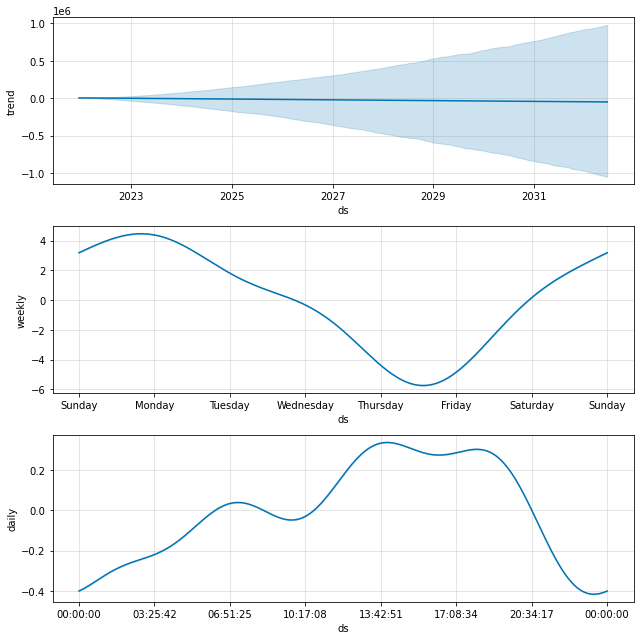

In [150]:
fig1 = model.plot_components(forecast)

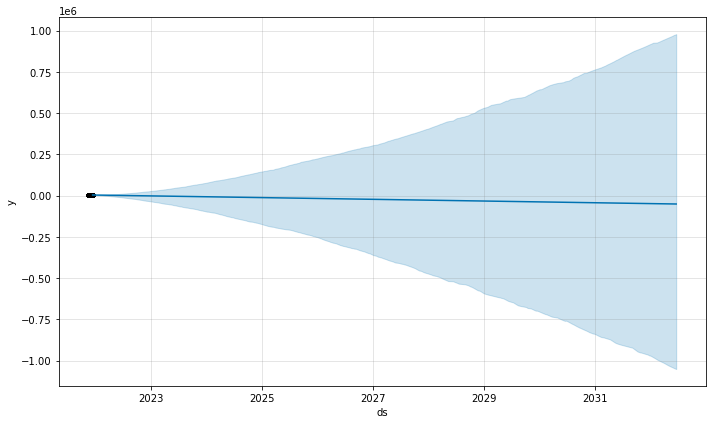

In [151]:
fig2 = model.plot(forecast)

In [152]:
result = pd.merge(df4_test, forecast, on="ds", how="inner", suffixes= ('_actual', '_predicted'))

#pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
result = result[['ds','y','yhat']]
result = result.rename(columns={'y': 'Actual', 'yhat': 'Predicted'})
result

,ds,Actual,Predicted
0,2021-12-16 00:19:59.995,NaN,3691.519948
1,2021-12-16 00:19:59.995,NaN,3691.519948
2,2021-12-16 00:19:59.995,NaN,3691.519948
3,2021-12-16 00:19:59.995,NaN,3691.519948
4,2021-12-16 00:39:59.995,NaN,3691.286743
...,...,...,...
4545,2032-06-11 04:19:59.990,NaN,-50814.867719
4546,2032-06-12 04:19:59.990,NaN,-50824.182294
4547,2032-06-13 04:19:59.990,NaN,-50835.684417
4548,2032-06-14 04:19:59.990,NaN,-50849.393274


In [153]:
result.to_csv("predlong.csv")

In [154]:

def mape(df):
  
    """
       This function takes a dataframe as an argument (with 'Actual' and 'Predicted' columns), 
       calculates the MAPE and returns the floting value of calculated MAPE.

    """

    # Copying the dataframe from the argument
    result_df = df

    # Adding '1' in both actual and predicted sales
    # to eliminate division by zero error
    actual_sales = result_df['Actual'] + 1
    forecasted_sales = result_df['Predicted'] + 1

    # Calculating MAPE
    MAPE = np.mean(abs((actual_sales - forecasted_sales) / actual_sales))
    MAPE = MAPE*100

    return MAPE

In [155]:
mapee = mape(result)
print(mapee)

nan


<AxesSubplot:xlabel='ds'>

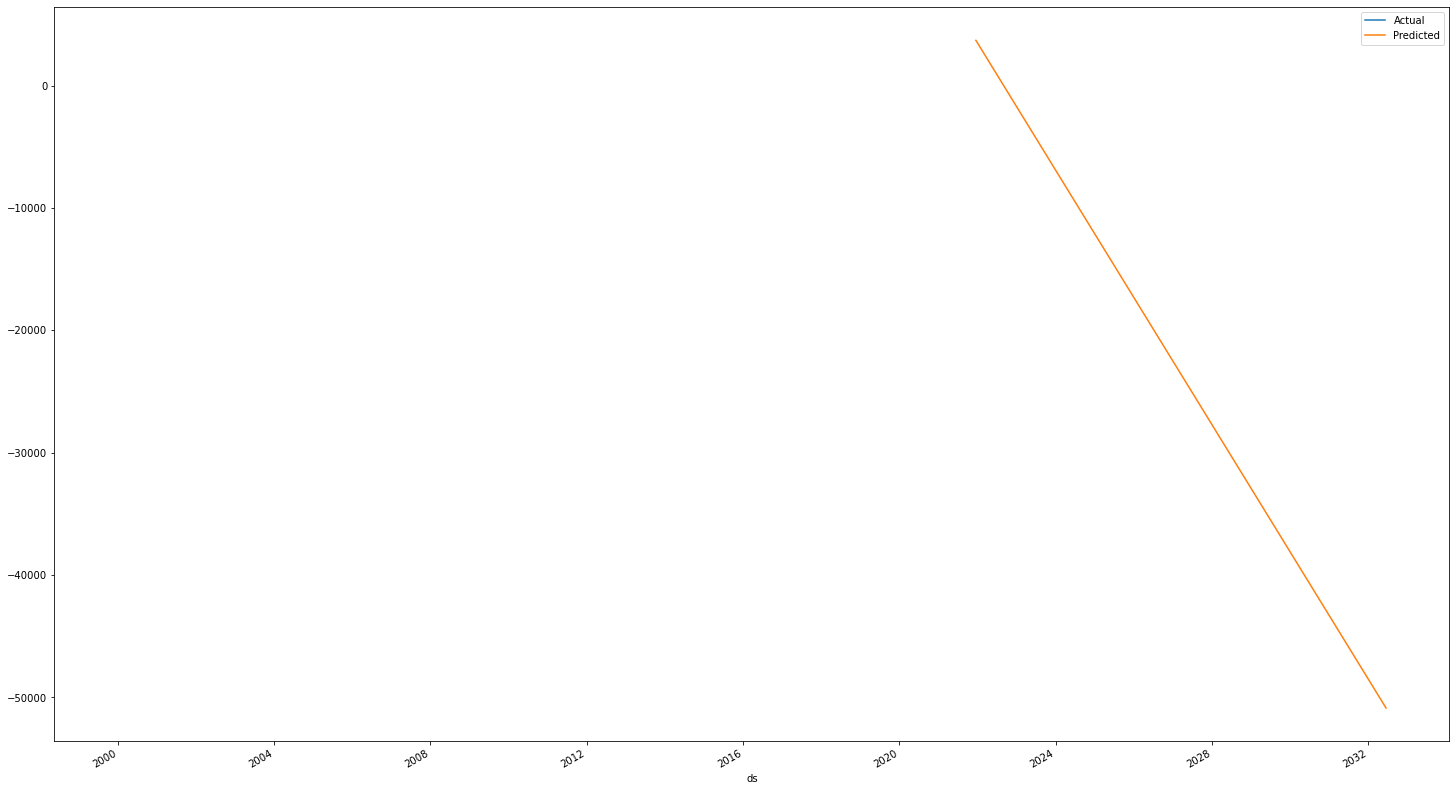

In [156]:

result.set_index('ds')[['Actual', 'Predicted']].plot(figsize=(25,15))